In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/movies.csv')
df1=pd.read_csv('/content/Ratings .csv')
df2=pd.read_csv('/content/user_data.csv')

In [ ]:
df=pd.read_csv('/content/movies.csv')
df.head()

,MoviesID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
a=pd.merge(df2,df1,on='UserID',how='left')
a.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [87]:
a2=pd.merge(a, v, on='MovieID', how='left')
a2.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [85]:
v=df.rename(columns={"MoviesID":"MovieID"})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


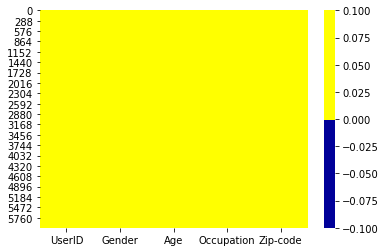

In [88]:

#Missing data heatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df5 = pd.read_csv('/content/user_data.csv')
cols = df5.columns[:500] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df5[cols].isnull(), cmap=sns.color_palette(colours))

no null values


In [91]:
num_cols=a2.columns
continues_v= []
cate=[]
for i in num_cols:
  if(len(a2[i].unique())) >=int(a2.shape[0]/20):
     continues_v.append(i)
  else:
    cate.append(i)
print ('continue variables',continues_v,'\n','Categorical Variables',cate) 

continue variables ['Timestamp'] 
 Categorical Variables ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID', 'Rating', 'Title', 'Genres']


In [92]:
#Missing data percentage list
import numpy as np
for col in a2.columns:
    pct_missing = np.mean(a2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

UserID - 0.0%
Gender - 0.0%
Age - 0.0%
Occupation - 0.0%
Zip-code - 0.0%
MovieID - 0.0%
Rating - 0.0%
Timestamp - 0.0%
Title - 0.0%
Genres - 0.0%


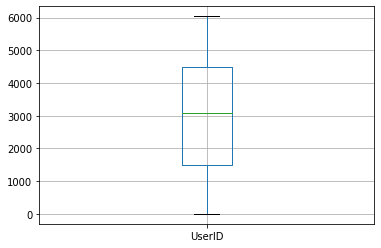

In [93]:
import matplotlib.pyplot as plt
import numpy as np

a2.boxplot(column='UserID')
a2['Age'+'_log'] = a2['Age'].map(lambda i: np.log(i) if i > 0 else 0) 

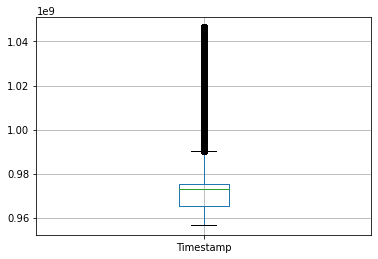

In [94]:
a2.boxplot(column='Timestamp')


In [95]:
a2[cate].skew()

UserID        0.005735
Age           0.398471
Occupation    0.404363
MovieID       0.092436
Rating       -0.553610
dtype: float64

In [96]:
for i in cate:
  a2[i] = np.where(a2[i] <int(a2[i].quantile(0.05)), int(a2[i].quantile(0.1)),a2[i])
  a2[i] = np.where(a2[i] >int(a2[i].quantile(0.97)), int(a2[i].quantile(0.9)),a2[i])
a2[cate].skew()

TypeError: ignored

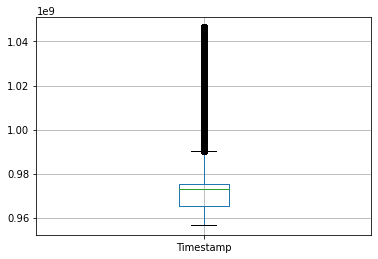

In [97]:
a2.boxplot(column='Timestamp')


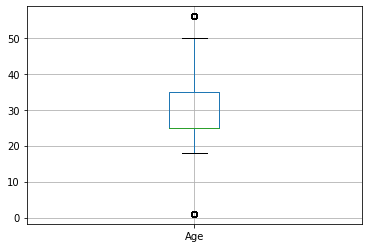

In [98]:
a2.boxplot(column='Age')


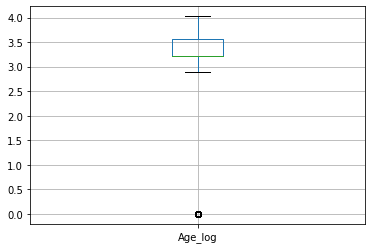

In [99]:
import numpy as np
a2['Age'+'_log'] = a2['Age'].map(lambda i: np.log(i) if i > 0 else 0) 
a2.boxplot(column='Age_log')

In [101]:
print('shape of ratings dataset',df1.shape)
print('shape of movies dataset',df.shape)
print('shape of userdata dataset',df2.shape)

shape of ratings dataset (1000209, 4)
shape of movies dataset (3883, 3)
shape of userdata dataset (6040, 5)


In [102]:
print('Ratings columns :',df1.columns)
print('movies columns :',df.columns)
print('userdata columns :',df2.columns)

Ratings columns : Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')
movies columns : Index(['MoviesID', 'Title', 'Genres'], dtype='object')
userdata columns : Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')


In [108]:
df1['Rating'].hist
df1.head()
df.head(20)

,MoviesID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


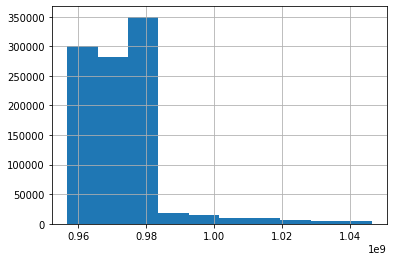

In [109]:
df1['Timestamp'].hist()

In [112]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [114]:
#here we  make census of the genres:
genre_labels = set()
for s in a2['Genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [115]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(a2,'Genres', genre_labels)
keyword_occurences

[['Comedy', 356580],
 ['Drama', 354529],
 ['Action', 257457],
 ['Thriller', 189680],
 ['Sci-Fi', 157294],
 ['Romance', 147523],
 ['Adventure', 133953],
 ['Crime', 79541],
 ['Horror', 76386],
 ["Children's", 72186],
 ['War', 68527],
 ['Animation', 43293],
 ['Musical', 41533],
 ['Mystery', 40178],
 ['Fantasy', 36301],
 ['Western', 20683],
 ['Film-Noir', 18261],
 ['Documentary', 7910]]

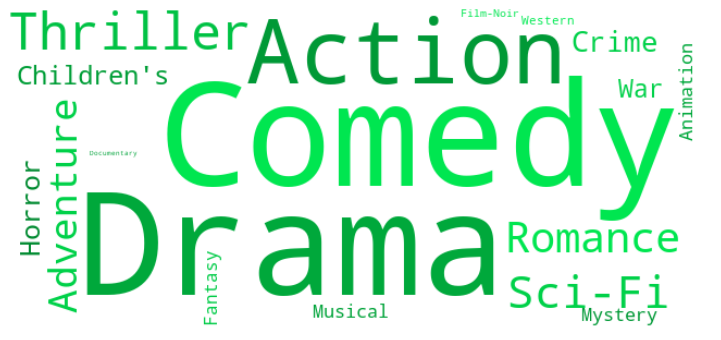

In [120]:
import matplotlib.pyplot as plt

# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

from wordcloud import WordCloud, STOPWORDS #used to generate world cloud


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=650,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()